### **First Step:**
- 🎧 The Spotify dataset will be loaded from the staging table into a Pandas DataFrame for further processing.
- 🛠️ The column display limit will be removed to ensure that all columns are visible when inspecting the DataFrame.
- 📊 An SQL query from the select_all_rows.sql file will be executed to retrieve data from the spotify_staging table, and this data will be converted into a Pandas DataFrame.
- 👀 The first 5 rows of the dataset will be previewed to get an initial understanding of its structure and content.

In [1]:
#Import Libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add the 'src' folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

#import previously created classes

from connections.db import PostgreSQLConnection
from utils.data_analysis_functions import DataAnalyzer

db_service = PostgreSQLConnection()

In [2]:
# Remove the column display limit to show all columns in the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
# Create a DataFrame from the Spotify staging table
spotify_data = db_service.create_dataframe('../sql/queries/select_all_rows.sql','spotify_staging')
spotify_data.head(5)

✓ DataFrame created successfully.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can t Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
#rows and columns
print(spotify_data.shape)

(114000, 21)


## **Second Step:**
- 📊 The dataset will be analyzed to understand its general structure and dimensions.
- 🔢 The number of rows and columns in the dataset will be checked.
- 🧮 Relevant numerical columns will be selected and analyzed to evaluate their statistical behavior.
- 📊 The DataAnalyzer class will be imported and used to generate descriptive statistics for the selected numerical columns.
- 📉 Histograms will be generated to visualize the distribution of numerical variables.
- 🗂️ Categorical columns will be identified and analyzed to understand their composition.
- 📊 Metrics such as frequencies or unique value counts will be generated for the categorical columns.
- 🔍 Records containing at least one missing value will be filtered to identify potential issues in the data.


In [5]:
#First we analyze numerical columns
selected_columns = ['energy', 'danceability', 'duration_ms', 'popularity','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
numerical_cols = spotify_data[selected_columns]
numerical_cols.shape

(114000, 11)

In [6]:
#Importamos la clase de DataAnalyzer para analizar los datos numericos
analyzer_statistic = DataAnalyzer(spotify_data)

In [7]:
statistics_numeric = analyzer_statistic.analyze_and_combine(selected_columns)
statistics_numeric

,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,mean,std,min,25%,50%,75%,max,Mode,Variance,Skewness,Kurtosis
0,acousticness,float64,3677,110323,0,110323,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996,1.00,1.100000e-01,0.73,-0.95
1,danceability,float64,1174,112826,0,112826,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985,0.65,3.000000e-02,-0.40,-0.18
2,duration_ms,int64,50697,63303,0,63303,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000,162897.00,1.151280e+10,11.20,354.95
3,energy,float64,2080,111920,0,111920,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000,0.88,6.000000e-02,-0.60,-0.53
4,instrumentalness,float64,3655,110345,0,110345,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000,0.00,1.000000e-01,1.73,1.27
5,liveness,float64,1722,112278,0,112278,114000.0,0.213553,0.190378,0.000,0.09800,0.132000,0.2730,1.000,0.11,4.000000e-02,2.11,4.38
6,loudness,float64,19480,94520,0,94520,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532,-5.66,2.529000e+01,-2.01,5.90
7,popularity,int64,101,113899,0,113899,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000,0.00,4.975200e+02,0.05,-0.93
8,speechiness,float64,1489,112511,0,112511,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965,0.03,1.000000e-02,4.65,28.82
9,tempo,float64,45653,68347,0,68347,114000.0,122.147837,29.978197,0.000,99.21875,122.017000,140.0710,243.372,0.00,8.986900e+02,0.23,-0.11


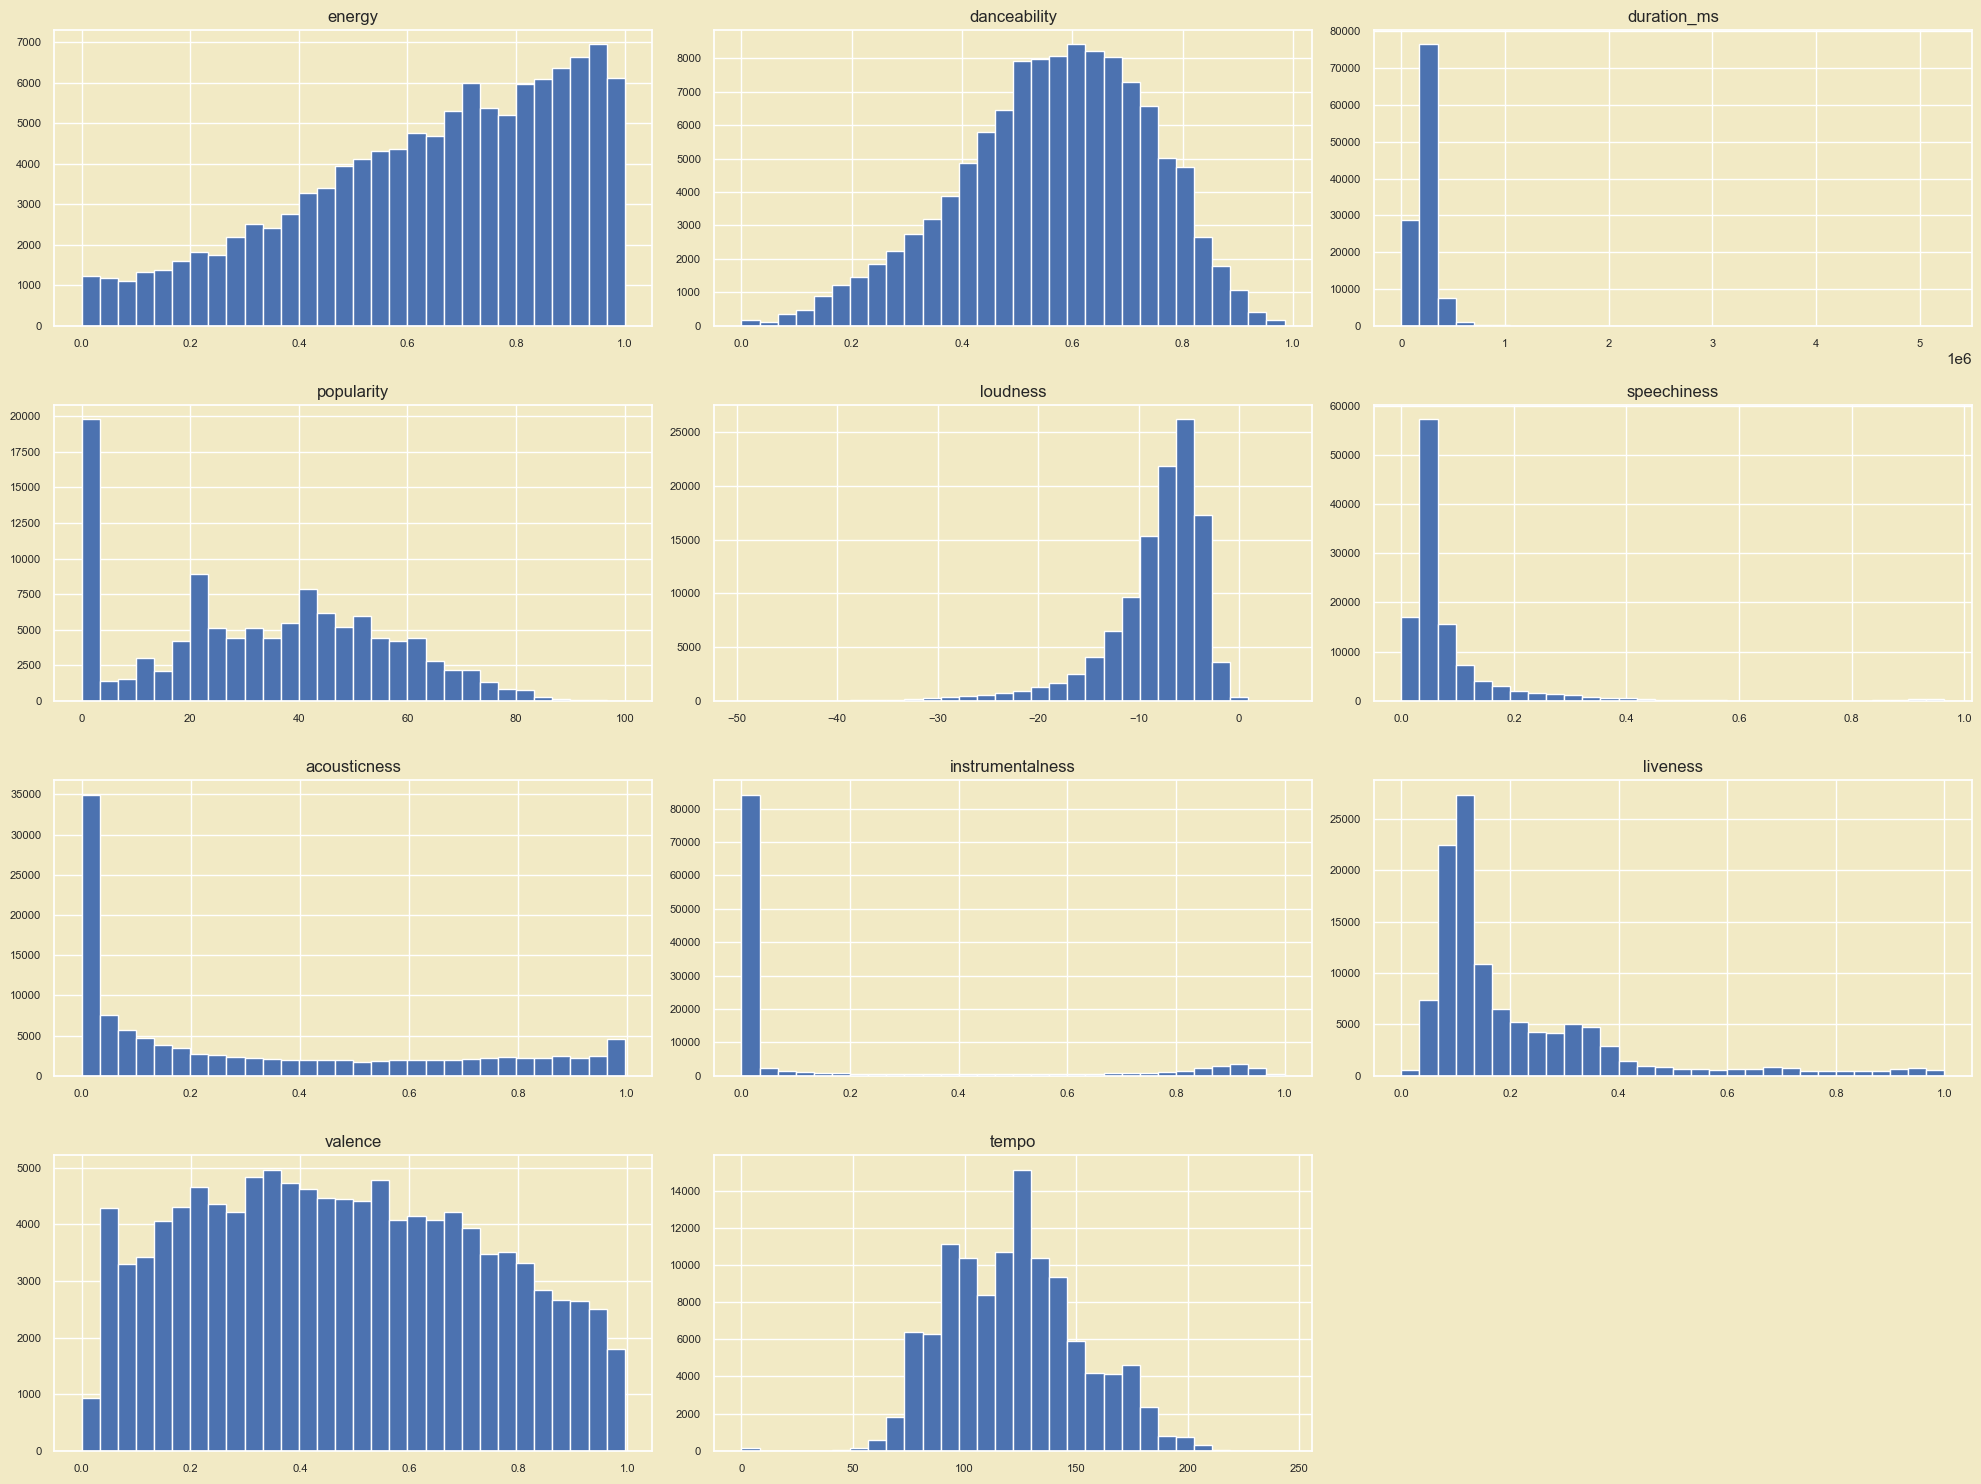

In [8]:
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [9]:
#Now we analyze categorical columns
categorical_columns_name = ['Unnamed: 0','track_id', 'artists', 'album_name', 'track_name','explicit_column','track_genre','time_signature','key_column','mode']
categorical_cols = spotify_data[categorical_columns_name]
categorical_cols.shape

(114000, 10)

In [10]:
analyser_categorical = analyzer_statistic.analize_categorical_data(categorical_columns_name)
analyser_categorical

,Column Name,Data Type,Unique Values,Repeated Values,Missing Values,Number of Duplicates,count,unique,top,freq
0,Unnamed: 0,int64,114000,0,0,0,114000,114000,113983,1
1,album_name,object,46589,67411,1,67410,113999,46589,Alternative Christmas 2022,195
2,artists,object,31437,82563,1,82562,113999,31437,The Beatles,279
3,explicit_column,bool,2,113998,0,113998,114000,2,False,104253
4,key_column,int64,12,113988,0,113988,114000,12,7,13245
5,mode,int64,2,113998,0,113998,114000,2,1,72681
6,time_signature,int64,5,113995,0,113995,114000,5,4,101843
7,track_genre,object,114,113886,0,113886,114000,114,acoustic,1000
8,track_id,object,89741,24259,0,24259,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
9,track_name,object,73608,40392,1,40391,113999,73608,Run Rudolph Run,151


In [11]:
# Filtrar los registros que tienen al menos un valor nulo
spotify_data[spotify_data.isnull().any(axis=1)]


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65939,65900,1kR4gIb7nGxHPI3D2ifs59,None,None,None,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### **Third Step:**
🔎 Analyze specific columns for detailed insights:
- Unnamed: 0 (🔢): 
    - 🔢 Verify if all values are integers and check if the values are auto-incremental.
    - ✅ Confirm if all values are unique.
- Track ID (🎫):
    - 🚨 Identify and handle duplicate records.
    - 🔍 Investigate specific records with a random track_id to understand any inconsistencies.
- Artists (🎤):
    - 🎤 Count unique artists and display their frequencies.
- Album Name (💿):
    - 💿 Count unique albums and their frequencies.
    - 🎶 Check if albums contain multiple unique artists and identify such cases, specifically for albums like "Hold On".
    - 🔒 Ensure that track_id values are unique for each combination of album and artist.
- Track Name (🎵):
    - 🎵 Count unique track names and display their frequencies.
- Explicit Column (🚫):
    - 🚫 Count occurrences of explicit and non-explicit songs.
    - 🥧 Visualize the distribution of explicit and non-explicit songs using a pie chart.
- Key Column (🎹):
    - 🎹 Count unique keys and display their frequencies.
    - 🥧 Visualize the distribution of key values with a pie chart.
- Mode (🎛️):
    - ⏱️ Count unique time signatures.
    - 🥧 Visualize the distribution of time signatures using a pie chart.
- Track Genre (🎧):
    - 🎧 Count unique genres and their frequencies.
    - ⚖️ Check if all genres have equal representation.
    - 📊 Visualize the genre distribution using a bar chart.
    - 🔀 Analyze if each track_id has multiple genres.
    - 📈 Calculate the percentage of tracks with more than one genre and display the results.

- **Unnamed_0**

In [12]:
unnamed_0 = spotify_data['Unnamed: 0'].sort_values()

In [13]:
unnamed_0.head(5)

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: object

In [14]:
# Verificar si todos los valores son enteros
are_integers = unnamed_0.dtype == 'int64'
print(f"Is 'Unnamed: 0' contain only integers?: {are_integers}")

Is 'Unnamed: 0' contain only integers?: False


In [15]:
# Ordenar la serie 'unnamed_0'
is_auto_incremental = (unnamed_0.diff().dropna() == 1).all()
print(f"Is 'Unnamed: 0' auto incremental?: {is_auto_incremental}")

Is 'Unnamed: 0' auto incremental?: True


In [16]:
# Verificar si todos los registros en 'unnamed_0' son diferentes
all_unique = unnamed_0.nunique() == len(unnamed_0)
print(f"Are all records in 'track_id' unique?: {all_unique}")

Are all records in 'track_id' unique?: True


- **track_id**

In [17]:
track_id = spotify_data['track_id']

In [18]:
track_id.head(5)

0    5SuOikwiRyPMVoIQDJUgSV
1    4qPNDBW1i3p13qLCt0Ki3A
2    1iJBSr7s7jYXzM8EGcbK5b
3    6lfxq3CG4xtTiEg7opyCyx
4    5vjLSffimiIP26QG5WcN2K
Name: track_id, dtype: object

In [19]:
#When reviewing the unique values of 'track_id' it can be seen that there are duplicate records. Therefore, 
# fetch all records with a random track_id to see what is going on
# Filter out records where the 'track_id' is equal to '6S3JlDAGk3uu3NtZbPnuhS'.

filtered_records = spotify_data[spotify_data['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']

# Print filtered records
filtered_records.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8324,8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19788,19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34756,34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62270,62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63129,63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock


- **artists**

In [20]:
artist = spotify_data['artists']

In [21]:
artist.head(5)

0               Gen Hoshino
1              Ben Woodward
2    Ingrid Michaelson ZAYN
3              Kina Grannis
4          Chord Overstreet
Name: artists, dtype: object

In [22]:
# Count of unique records in 'artists' and this quantity
print(f"The count of unique artists in the dataset and their respective quantities are as follows:\n{artist.value_counts()}")

The count of unique artists in the dataset and their respective quantities are as follows:
artists
The Beatles                                 279
George Jones                                271
Stevie Wonder                               236
Linkin Park                                 224
Ella Fitzgerald                             222
                                           ... 
Hillsong Worship TAYA David Ware              1
Bethel Music Jenn Johnson Chris Quilala       1
Chris Tomlin Bear Rinehart NEEDTOBREATHE      1
Eddie Vedder Nusrat Fateh Ali Khan            1
Bethel Music Sydney Allen                     1
Name: count, Length: 31437, dtype: int64


- **album_name**

In [23]:
album_name = spotify_data['album_name']

In [24]:
album_name.head(5)

0                                               Comedy
1                                     Ghost (Acoustic)
2                                       To Begin Again
3    Crazy Rich Asians (Original Motion Picture Sou...
4                                              Hold On
Name: album_name, dtype: object

In [25]:
# Count of unique records in 'album_name' and this quantity
print(f"The count of unique albums in the dataset and their respective quantities are as follows:\n{album_name.value_counts()}")

The count of unique albums in the dataset and their respective quantities are as follows:
album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
                              ... 
A Greater Song (Live)            1
This is Thetahealing             1
Phenomena (DA DA) Remixes        1
What A Beautiful Name - EP       1
The Boy Who Never                1
Name: count, Length: 46589, dtype: int64


In [26]:
#verifying if the column 'album_name' has a diferent artist name

# Group by album and count the number of unique artists
albums_with_multiple_artists = spotify_data.groupby('album_name')['artists'].nunique()

# Filter those albums that have more than one artist
albums_with_different_artists = albums_with_multiple_artists[albums_with_multiple_artists > 1].index

# Get specific records of albums with different artists
different_artists_per_album = spotify_data[spotify_data['album_name'].isin(albums_with_different_artists)]

# Filter the specific album you're interested in, in this case "Hold On"
specific_album = different_artists_per_album[different_artists_per_album['album_name'] == 'Hold On']

# Show the records of the album "Hold On" with different artists
specific_album



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit_column,danceability,energy,key_column,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469000,0.000000,0.0829,0.1670,119.949,4,acoustic
957,954,7qHPp1beQupJUzwRyVtoyy,Chord Overstreet,Hold On,Hold On,35,198853,False,0.609,0.443,2,-9.681,1,0.0546,0.469000,0.000000,0.0829,0.1660,119.967,4,acoustic
13826,13802,5KKyQmvhDblL9h24iMMDzC,Romanthony,Hold On,Hold On - Classic Vocal,5,385753,False,0.667,0.865,4,-5.116,1,0.3960,0.005690,0.000002,0.1010,0.4890,119.790,4,chicago-house
23705,23658,7hOXCmwRv1oDNWfxQrwZoy,Ali Bakgor biskuwi widerberg,Hold On,Hold On,41,183445,False,0.592,0.859,2,-8.768,0,0.0326,0.000158,0.914000,0.1120,0.0798,123.009,4,deep-house
46861,46805,5CCyKw0w72mueGAfyQecGK,Jakka-B,Hold On,Hold On,16,219636,False,0.396,0.632,3,-3.213,0,0.0369,0.079800,0.000000,0.0710,0.2270,164.784,4,happy
110818,110817,4ppG3XawSqo2b0qpq4E3vb,Armin van Buuren Davina Michelle,Hold On,Hold On,55,207727,False,0.603,0.738,7,-5.464,0,0.0646,0.037000,0.000002,0.1600,0.3270,132.047,4,trance


In [27]:
# Verifying if all track_id values are unique for each unique combination of album and artist
unique_combinations = spotify_data[['album_name', 'artists', 'track_id']].drop_duplicates()

# Check if all track_id values are unique within these combinations
are_all_track_ids_unique = unique_combinations['track_id'].nunique() == unique_combinations.shape[0]

# Print the result
print(f"Are all records in 'track_id' unique for each unique combination of album and artist?: {are_all_track_ids_unique}")

#Conclusions: Es diferentes discos debido a que el track_id es diferente lo que cambia es el ritmo del album o la version del album

Are all records in 'track_id' unique for each unique combination of album and artist?: True


- **track_name**

In [28]:
track_name = spotify_data['track_name']

In [29]:
track_name.head(5)

0                        Comedy
1              Ghost - Acoustic
2                To Begin Again
3    Can t Help Falling In Love
4                       Hold On
Name: track_name, dtype: object

In [30]:
# Count of unique records in 'track_name' and this quantity
print(f"The count of unique track names in the dataset and their respective quantities are as follows:\n{track_name.value_counts()}")

The count of unique track names in the dataset and their respective quantities are as follows:
track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
                                 ... 
Encased in Ice                      1
Eu Quero É Que Se Foda              1
Hallelujah On My Knees - Live       1
Stay (You Are Good) - Live          1
Sueños Vividos                      1
Name: count, Length: 73608, dtype: int64


- **explicit_column**

In [48]:
explicit_column = spotify_data['explicit_column']

In [49]:
explicit_column.head(5)

0    False
1    False
2    False
3    False
4    False
Name: explicit_column, dtype: object

In [50]:
#Count of unique records in 'explicit_column' and this quantity
print(f"The count of explicit_column names in the dataset and their respective quantities are as follows:\n{explicit_column.value_counts()}")

The count of explicit_column names in the dataset and their respective quantities are as follows:
explicit_column
False    104253
True       9747
Name: count, dtype: int64


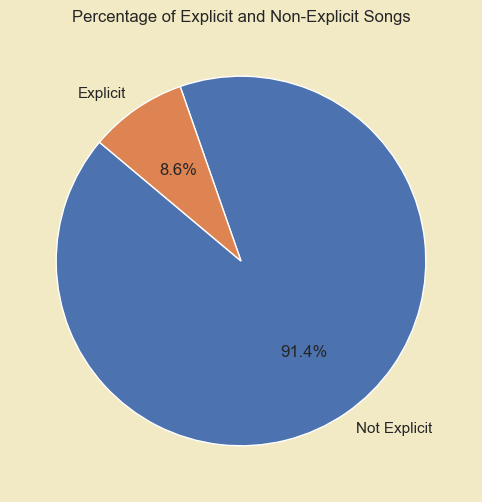

In [34]:
#create a pie_chart of the explicit_column column
plt.figure(figsize=(10, 6))
plt.pie(explicit_column.value_counts(), labels=['Not Explicit', 'Explicit'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Explicit and Non-Explicit Songs')
plt.show()

- **key_column**

In [53]:
key_column = spotify_data['key_column']

In [54]:
key_column.head(5)

0    1
1    1
2    0
3    0
4    2
Name: key_column, dtype: object

In [55]:
# Count of unique records in 'key_column' and this quantity
print(f"The count of unique track names in the dataset and their respective quantities are as follows:\n{key_column.value_counts()}")

The count of unique track names in the dataset and their respective quantities are as follows:
key_column
7     13245
0     13061
2     11644
9     11313
1     10772
5      9368
11     9282
4      9008
6      7921
10     7456
8      7360
3      3570
Name: count, dtype: int64


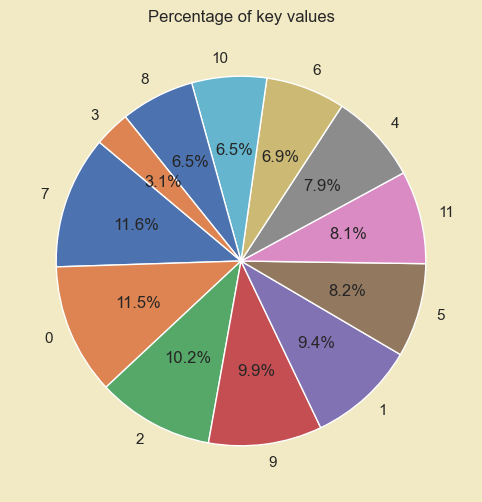

In [56]:
# create a pie chart of the key_column column
plt.figure(figsize=(10, 6))
# Using key_column.unique() and key_column.value_counts() for the labels and values respectively
plt.pie(key_column.value_counts(), labels=key_column.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of key values')
plt.show()

- **time_signature**

In [60]:
time_signature = spotify_data['time_signature']

In [61]:
time_signature.head(5)

0    4
1    4
2    4
3    3
4    4
Name: time_signature, dtype: object

In [62]:
# Count of unique records in 'time_signature' and this quantity
print(f"The count of unique time_signature values in the dataset and their respective quantities are as follows:\n{time_signature.value_counts()}")

The count of unique time_signature values in the dataset and their respective quantities are as follows:
time_signature
4    101843
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64


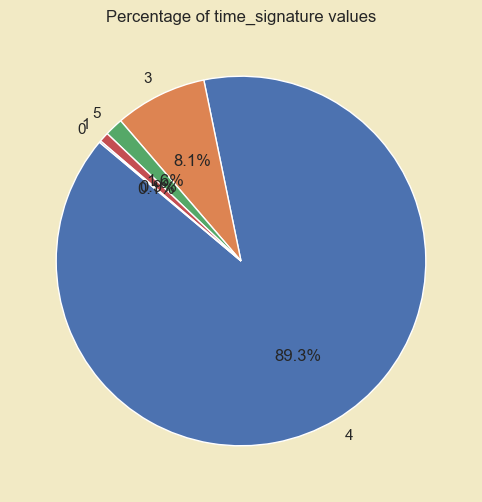

In [63]:
# create a pie chart of the time_signature column
plt.figure(figsize=(10, 6))
# Using time_signature.unique() and time_signature.value_counts() for the labels and values respectively
plt.pie(time_signature.value_counts(), labels=time_signature.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of time_signature values')
plt.show()

- **mode**


In [4]:
mode = spotify_data['mode']

In [65]:
mode.head(5)

0    0
1    1
2    1
3    1
4    1
Name: mode, dtype: object

In [66]:
# Count of unique records in 'mode' and this quantity
print(f"The count of unique mode values in the dataset and their respective quantities are as follows:\n{mode.value_counts()}")

The count of unique mode values in the dataset and their respective quantities are as follows:
mode
1    72681
0    41319
Name: count, dtype: int64


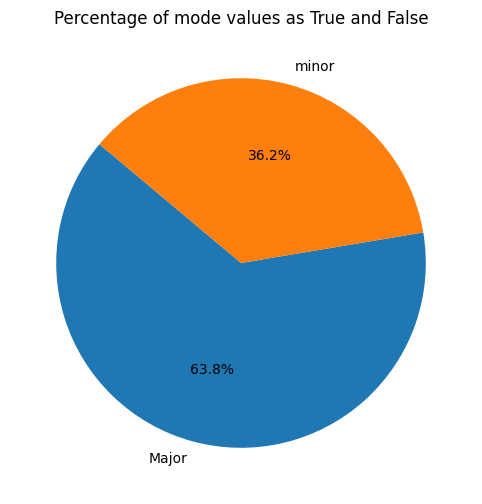

In [5]:
# create a pie chart of the mode column
plt.figure(figsize=(10, 6))

# Replace 0 and 1 by False and True respectively.
labels = mode.value_counts().index.map({0: 'minor', 1: 'Major'})

# Use mode.value_counts() for values
plt.pie(mode.value_counts(), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of mode values as True and False')
plt.show()


- **track_genre**

In [76]:
track_genre = spotify_data['track_genre']

In [77]:
track_genre.head(5)

0    acoustic
1    acoustic
2    acoustic
3    acoustic
4    acoustic
Name: track_genre, dtype: object

In [74]:
# Count of unique records in 'track_genre' and this quantity
print(f"The count of unique track_genre values in the dataset and their respective quantities are as follows:\n{track_genre.value_counts()}")

The count of unique track_genre values in the dataset and their respective quantities are as follows:
track_genre
acoustic       1000
alternative    1000
black-metal    1000
alt-rock       1000
afrobeat       1000
               ... 
swedish        1000
tango          1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64


In [79]:
# Check if all categories have the same number of values
genre_counts = track_genre.value_counts()
all_equal = genre_counts.nunique() == 1
# Imprimir el resultado
print(f"Do all categories have the same number of values?: {all_equal}")

Do all categories have the same number of values?: True


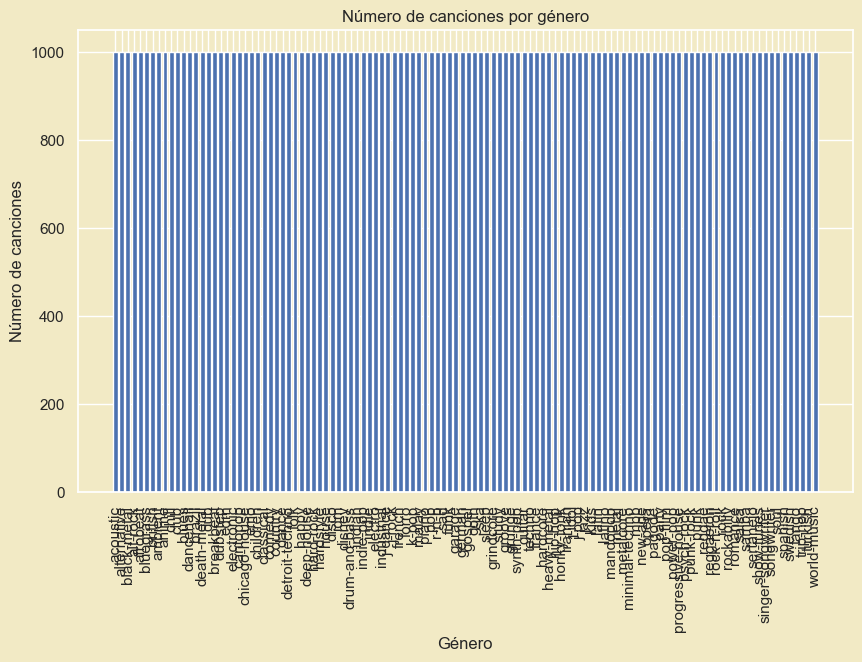

In [83]:
# create a bar chart of the track_genre column
plt.figure(figsize=(10, 6))
# Using genre_counts.index and genre_counts for the labels and values respectively
plt.bar(genre_counts.index, genre_counts)
plt.title('Número de canciones por género')
plt.xlabel('Género')
plt.ylabel('Número de canciones')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.show()

In [84]:
# Obtaining the unique genres for each track_id
track_genre_groups = spotify_data.groupby('track_id')['track_genre'].nunique()

# Check if all track_ids have a single genre
have_different_genres = track_genre_groups.max() > 1

print(f"Do all 'track_id's have different genres?: {have_different_genres}")

Do all 'track_id's have different genres?: True


In [87]:
# Count how many unique genres each track_id has
track_genre_counts = spotify_data.groupby('track_id')['track_genre'].nunique()

# Filter those track_id that have more than one genre
multiple_genres = track_genre_counts[track_genre_counts > 1]

# Show how many track_id have different genres
count_multiple_genres = multiple_genres.count()

# Calculate the total number of unique track_id
total_track_ids = track_genre_counts.count()

# Calculate the percentage of track_id with multiple genres
percentage_multiple_genres = (count_multiple_genres / total_track_ids) * 100

# Print the results
print(f"Number of track_id's with multiple genres: {count_multiple_genres}")
print(f"Percentage of track_id's with multiple genres: {percentage_multiple_genres:.2f}%")


Number of track_id's with multiple genres: 16299
Percentage of track_id's with multiple genres: 18.16%


# DataFrame Column Explanations

1. Unnamed: 0 (🔢)
- Description: Column with auto-incremental and unique property.
- Data Type: Integer.
- Unique Values: True
- Analysis Notes: It was analyzed whether the column is a positive integer, auto-incremental, and unique, thus making it a candidate for the primary key of the table.

2. Track ID (🎫)
- Description: Column that serves as a unique identifier on Spotify.
- Data Type: String
- Unique Values: False
- Analysis Notes: This column was analyzed and found to have repeated information several times, with slight variations in musical genre.

3. Artists (🎤)
- Description: The names of the artists who performed the track.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 31,437 different artists, with the group The Beatles standing out with 279 appearances.

4. Album Name (💿)
- Description: The album name in which the track appears.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 46,589 different albums, with "Alternative Christmas 2022" highlighted with 195 appearances. Although the artist or album name may repeat, they are different due to having different track IDs and additional information.

5. Track Name (🎵)
- Description: Name of the track.
- Data Type: String
- Unique Values: False
- Analysis Notes: There are 73,608 different track names.

6. Explicit Column (🚫)
- Description: Indicates whether the track has explicit lyrics (true = yes; false = no or unknown).
- Data Type: Boolean
- Unique Values: False
- Analysis Notes: 91.4% of the songs are not explicit.

7. Key Column (🎹)
- Description: The key the track is in. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 1 = C♯/D♭, 2 = D).
- Data Type: Integer - Categorical
- Unique Values: False
- Analysis Notes: Contains 12 unique values in a non-continuous range from 0 to 11, with the most frequent being 7, appearing 13,245 times. It should be noted that this is a categorical variable as it represents something rather than just a number.

8. Time Signature (⏱️)
- Description: An estimated time signature. The time signature (meter) specifies how many beats are in each bar (or measure). The time signature ranges from 0 to 4, indicating time signatures from 0/4 to 4/4.
- Data Type: Integer - Categorical
- Unique Values: False
- Analysis Notes: Contains 5 unique values, with the most frequent being 4/4, appearing in 101,843 songs. Like the key column, it is a non-continuous categorical variable since it signifies something.

9. Mode (🎛️)
- Description: Mode indicates the modality (Major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor by 0.
- Data Type: Boolean
- Unique Values: False
- Analysis Notes: Contains 2 unique values stored in the database as 1 and 0, which represent Major and Minor, respectively, with 63.8% of the songs being Major.

10. Track Genre (🎧)
- Description: The genre in which the track belongs.
- Data Type: String
- Unique Values: False
- Analysis Notes: Contains 114 unique values, with each containing 1,000 associated songs. As mentioned earlier, there are several records with the same track ID that have different genres.

11. Energy (🔋)
- Description: Energy is a measure from 0.0 to 1.0, representing a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 2,080 values between 0.0 and 1.0, with an average energy of 0.64, indicating that most songs are at an intermediate level, leaning slightly towards loud, fast, and energetic music.

12. Danceability (💃)
- Description: Danceability describes how suitable a track is for dancing based on a combination of musical elements, including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 1,174 values, with an average around 0.58, suggesting that while the tracks can be danced to, they may not be as rhythmic and pleasant as others.

13. Duration_ms (⏲️)
- Description: The track length in milliseconds.
- Data Type: Integer
- Unique Values: False
- Analysis Notes: Contains 50,697 different durations, with an average of 212,906 ms or 3.54 minutes.

14. Popularity (🎯)
- Description: The popularity of a track ranges from 0 to 100 and is based on the total number of plays and their recency. Recently played songs have higher popularity. The popularity of artists and albums derives from the popularity of their tracks.
- Data Type: Integer
- Unique Values: False
- Analysis Notes: Contains 101 unique values, with an average of 35, indicating that the tracks are not very well known.

15. Loudness (🔊)
- Description: The overall loudness of a track in decibels (dB).
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 19,480 different records, with an average decibel level around -7, indicating that they are quieter than the average songs.

16. Speechiness (🗣️)
- Description: Measures the presence of spoken words in a track: > 0.66: Mainly spoken words (e.g., audiobooks, poetry), 0.33 - 0.66: Combines music and speech (e.g., rap), < 0.33: Predominantly music without spoken content.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 1,489 unique records in a range from 0 to 0.96, with an average of 0.048, indicating that most songs are primarily instrumental or sung rather than spoken.

17. Acousticness (🌲)
- Description: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. A value of 1.0 represents high confidence that the track is acoustic.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 3,677 values in a range from 0 to 1, with an average of 0.16, indicating that it likely includes more electronic or synthesized sounds rather than pure acoustic instruments.

18. Instrumentalness (🎻)
- Description: Predicts whether a track has no vocals. Sounds like "ooh" and "aah" are considered instrumental. A value close to 1.0 indicates a higher probability that the track has no vocal content.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 3,655 unique values, with an average very close to zero, indicating that 99% of the songs have vocal content.

19. Liveness (🎤)
- Description: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
- Data Type: float64
- Unique Values: False
- Analysis Notes: Contains 1,722 unique records in a range from 0 to 1, with an average of 0.13, indicating that they contain at least some vocal content.

20. Valence (😊)
- Description: A measure from 0.0 to 1.0 describing the musical positivity conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).
- Data Type: Float64
- Unique Values: False
- Analysis Notes: Contains 1,790 unique values in a range from 0 to 1, with an average of 0.46, indicating that the track mixes music and spoken words, as in rap or songs with spoken sections.

21. Tempo (🔄)
- Description: The tempo of a track in beats per minute (BPM).
- Data Type: Float
- Unique Values: False
- Analysis Notes: Contains 82,439 values, with an average of 122 BPM, indicating a slight preference for danceable songs.

##